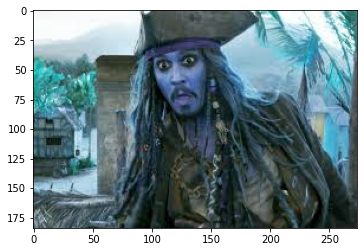

[[242.16470588 244.11764706 244.11764706]
 [241.18823529 243.14117647 243.14117647]
 [241.18823529 243.14117647 243.14117647]
 [241.18823529 243.14117647 243.14117647]
 [240.21176471 242.16470588 242.16470588]
 [239.24705882 241.19215686 241.19215686]
 [239.24705882 241.19215686 241.19215686]
 [238.2745098  240.21960784 240.21960784]
 [237.31372549 239.25098039 239.25098039]
 [237.31372549 239.25098039 239.25098039]
 [237.31372549 239.25098039 239.25098039]
 [237.31372549 239.25098039 239.25098039]
 [237.31372549 239.25098039 239.25098039]
 [237.31372549 239.25098039 239.25098039]
 [237.31372549 239.25098039 239.25098039]
 [237.31372549 239.25098039 239.25098039]
 [240.21960784 242.15686275 242.15686275]
 [240.21960784 242.15686275 242.15686275]
 [243.1372549  245.09803922 245.09803922]
 [243.1372549  245.09803922 245.09803922]
 [243.1372549  245.09803922 245.09803922]
 [243.1372549  245.09803922 245.09803922]
 [243.1372549  245.09803922 245.09803922]
 [243.1372549  245.09803922 245.09

In [129]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("h.jpg")


plt.imshow(img)
plt.show()

img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype('uint8')

se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
se2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
mask = cv2.morphologyEx(img_bw, cv2.MORPH_CLOSE, se1)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, se2)

mask = np.dstack([mask, mask, mask]) / 255
out = img * mask

cv2.imshow('Output', out)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('output.png', out)
print(out[1])

import matplotlib.pyplot as plt
from skimage import morphology
import numpy as np
import skimage

# read the image, grayscale it, binarize it, then remove small pixel clusters

grayscale = skimage.color.rgb2gray(im2)
binarized = np.where(grayscale>0.1, 1, 0)
processed = morphology.remove_small_objects(binarized.astype(bool), min_size=2, connectivity=2).astype(int)

# black out pixels
mask_x, mask_y = np.where(processed == 0)
im[mask_x, mask_y, :3] = 0

# plot the result
plt.figure(figsize=(10,10))
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


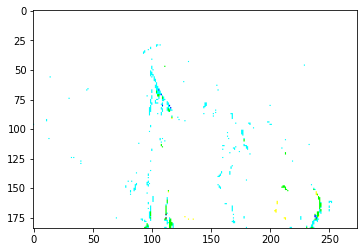

In [112]:
img_bw = 255*(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) > 5).astype('uint8')
plt.imshow(img)
plt.show()

In [111]:
out.shape

(184, 274, 3)

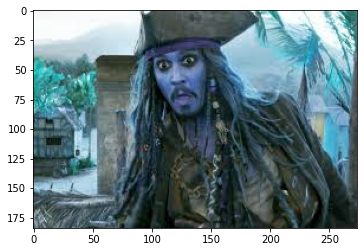

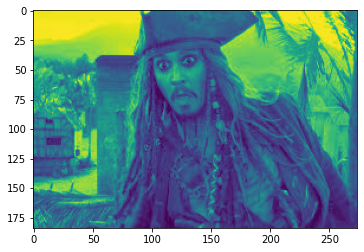

(184, 274)

In [117]:
img = cv.imread("h.jpg")


plt.imshow(img)
plt.show()

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()
img.shape

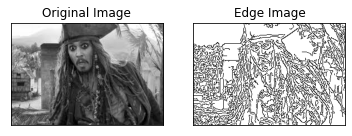

In [98]:
highThresh, threshIm = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
lowThresh = 0.5*highThresh



edges = cv.Canny(img,lowThresh,highThresh)

edges = cv2.bitwise_not(edges)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

ValueError: operands could not be broadcast together with shapes (184,274) (184,274,3) 

In [82]:
img = cv2.bitwise_not(img)

([], [])

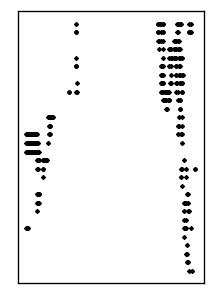

In [89]:
import numpy as np  
import matplotlib.pyplot as plt  
  

bw_image_array = np.array(img, dtype=np.int)  
black_indices = np.argwhere(bw_image_array == 1)  
# Changing "size" to a larger value makes this algorithm take longer,  
# but provides more granularity to the portrait  
chosen_black_indices = black_indices[  
                           np.random.choice(black_indices.shape[0],  
                                            replace=True,  
                                            size=10000)]  
  
plt.figure(figsize=(2, 3), dpi=120)  
plt.scatter([x[1] for x in chosen_black_indices],  
            [x[0] for x in chosen_black_indices],  
            color='black', s=1)  
plt.gca().invert_yaxis()  
plt.xticks([])  
plt.yticks([])  

In [60]:
from scipy.spatial.distance import pdist, squareform  
  
distances = pdist(chosen_black_indices)  
distance_matrix = squareform(distances) 

In [61]:
from tsp_solver.greedy_numpy import solve_tsp  
  
optimized_path = solve_tsp(distance_matrix)  

In [62]:
optimized_path_points = [chosen_black_indices[x] for x in optimized_path] 


([], [])

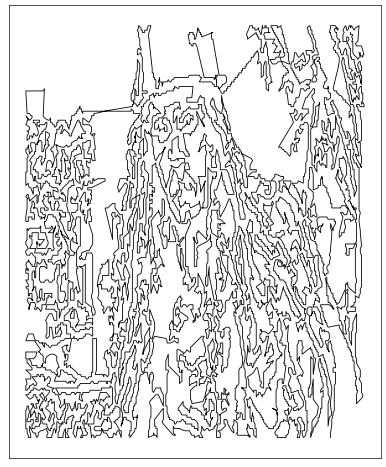

In [63]:
plt.figure(figsize=(8, 10), dpi=60)  
plt.plot([x[1] for x in optimized_path_points],  
         [x[0] for x in optimized_path_points],  
         color='black', lw=1)   
plt.gca().invert_yaxis()  
plt.xticks([])  
plt.yticks([])  

([], [])

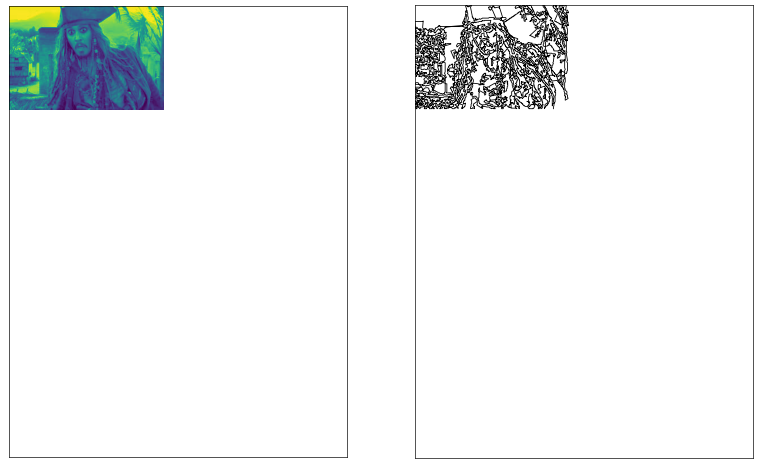

In [64]:
plt.figure(figsize=(16, 10), dpi=60)  
  
plt.subplot(1, 2, 1)  
plt.imshow(img)  
plt.grid(False)  
plt.xlim(0, 600)  
plt.ylim(0, 800)  
plt.gca().invert_yaxis()  
plt.xticks([])  
plt.yticks([])  
  
plt.subplot(1, 2, 2)  
plt.plot([x[1] for x in optimized_path_points],  
         [x[0] for x in optimized_path_points],  
         color='black', lw=1)  
plt.grid(False)  
plt.xlim(0, 600)  
plt.ylim(0, 800)  
plt.gca().invert_yaxis()  
plt.xticks([])  
plt.yticks([])  

In [65]:
print(optimized_path_points)


[array([183, 246], dtype=int64), array([182, 246], dtype=int64), array([181, 246], dtype=int64), array([177, 247], dtype=int64), array([176, 247], dtype=int64), array([175, 247], dtype=int64), array([173, 248], dtype=int64), array([172, 248], dtype=int64), array([171, 249], dtype=int64), array([170, 249], dtype=int64), array([169, 249], dtype=int64), array([168, 249], dtype=int64), array([167, 249], dtype=int64), array([166, 249], dtype=int64), array([165, 249], dtype=int64), array([163, 249], dtype=int64), array([162, 249], dtype=int64), array([161, 249], dtype=int64), array([160, 249], dtype=int64), array([159, 250], dtype=int64), array([158, 250], dtype=int64), array([157, 250], dtype=int64), array([156, 250], dtype=int64), array([155, 250], dtype=int64), array([154, 250], dtype=int64), array([154, 248], dtype=int64), array([152, 248], dtype=int64), array([152, 250], dtype=int64), array([151, 250], dtype=int64), array([150, 250], dtype=int64), array([150, 249], dtype=int64), array([

In [66]:
len(optimized_path_points)


10000

In [67]:
optimized_path_points[0][1]

246

In [68]:
import json

In [74]:
l = len(optimized_path_points)
print(l)
data = ''

10000


In [75]:
for i in range(0,l):
    data = data + '{ x:'+ str(optimized_path_points[i][1]+0.5) + ', y:'+ str(optimized_path_points[i][0]+0.5) + '},'

In [76]:
print(data)

{ x:246.5, y:183.5},{ x:246.5, y:182.5},{ x:246.5, y:181.5},{ x:247.5, y:177.5},{ x:247.5, y:176.5},{ x:247.5, y:175.5},{ x:248.5, y:173.5},{ x:248.5, y:172.5},{ x:249.5, y:171.5},{ x:249.5, y:170.5},{ x:249.5, y:169.5},{ x:249.5, y:168.5},{ x:249.5, y:167.5},{ x:249.5, y:166.5},{ x:249.5, y:165.5},{ x:249.5, y:163.5},{ x:249.5, y:162.5},{ x:249.5, y:161.5},{ x:249.5, y:160.5},{ x:250.5, y:159.5},{ x:250.5, y:158.5},{ x:250.5, y:157.5},{ x:250.5, y:156.5},{ x:250.5, y:155.5},{ x:250.5, y:154.5},{ x:248.5, y:154.5},{ x:248.5, y:152.5},{ x:250.5, y:152.5},{ x:250.5, y:151.5},{ x:250.5, y:150.5},{ x:249.5, y:150.5},{ x:249.5, y:149.5},{ x:249.5, y:148.5},{ x:249.5, y:147.5},{ x:248.5, y:146.5},{ x:248.5, y:145.5},{ x:247.5, y:144.5},{ x:247.5, y:143.5},{ x:247.5, y:142.5},{ x:246.5, y:141.5},{ x:246.5, y:140.5},{ x:244.5, y:141.5},{ x:244.5, y:143.5},{ x:244.5, y:144.5},{ x:245.5, y:145.5},{ x:243.5, y:143.5},{ x:243.5, y:142.5},{ x:242.5, y:141.5},{ x:242.5, y:140.5},{ x:244.5, y:140.5},

In [239]:
print(edges)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255   0 255 ... 255 255 255]
 [255 255   0 ... 255 255 255]
 [255 255   0 ... 255 255 255]]


In [263]:

import numpy as np

#noise reduction
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

# Gradient Calculation
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return G, theta


def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return res, weak, strong

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [264]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

rgbi = cv2.imread("h.jpg")
rgbi = rgbi[:,:,::-1]
#plt.imshow(img)
#plt.show()


gi = cv2.cvtColor(rgbi, cv2.COLOR_BGR2GRAY)

(thresh, bwi) = cv2.threshold(gi, 127, 255, cv2.THRESH_BINARY)

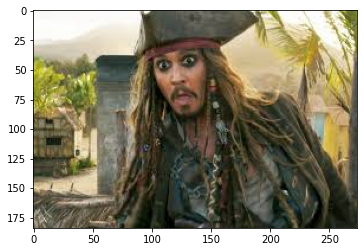

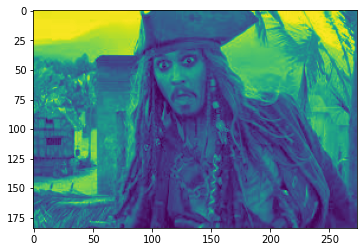

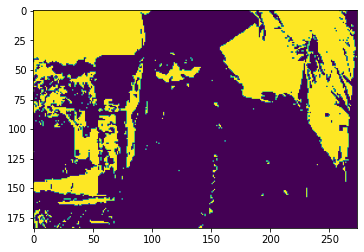

In [265]:
plt.imshow(rgbi)
plt.show()

plt.imshow(gi)
plt.show()

plt.imshow(bwi)
plt.show()

In [266]:
s = gi.shape[::-2]

print(s)
g = gaussian_kernel(str(274))

(274,)


In [272]:
from scipy import ndimage
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)
g, theta = sobel_filters(g)
z = non_max_suppression(g, theta)
r,w,s = threshold(z, lowThresholdRatio=0.05, highThresholdRatio=0.09)

a = hysteresis(gi, w, strong=255)


array([[248, 248, 248, ...,  83,  98, 110],
       [249, 248, 248, ..., 117,  96, 108],
       [249, 249, 248, ...,  96, 106, 118],
       ...,
       [101, 107, 151, ...,  30,  41,  41],
       [101,  91, 131, ...,  30,  40,  40],
       [116,  97, 130, ...,  30,  37,  37]], dtype=uint8)

TypeError: Invalid shape (2, 275, 275) for image data

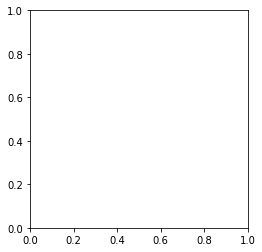

In [273]:
plt.imshow(a)
plt.show()

Noise reduction;
Gradient calculation;
Non-maximum suppression;
Double threshold;
Edge Tracking by Hysteresis.

In [274]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

rgbi = cv2.imread("h.jpg")
rgbi = rgbi[:,:,::-1]
#plt.imshow(img)
#plt.show()


gi = cv2.cvtColor(rgbi, cv2.COLOR_BGR2GRAY)

In [275]:
blur = cv.GaussianBlur(img,(5,5),0)

In [276]:
img = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
img = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

In [278]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return res, weak, strong

In [279]:
r, w, s = threshold(img)

In [280]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [281]:
i = hysteresis(img,w)

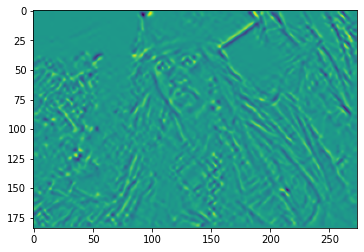

In [282]:
plt.imshow(i)
plt.show()